In [19]:
import pandas as pd
import numpy as np
from ast import literal_eval
import seaborn as sns

## Merging Data

### Original Dataset

In [2]:
ds_all = pd.read_json('../data/train.json')
ds_all.head()

,document,full_text,tokens,trailing_whitespace,labels
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST..."


### Extended Dataset from Mistral

In [3]:
ds_external = pd.read_csv('../data/pii_dataset.csv', converters={
    'tokens': literal_eval,
    'labels': literal_eval,
    'trailing_whitespace': literal_eval
})
ds_external.rename(columns={'text': 'full_text'}, inplace=True)
ds_external = ds_external.iloc[:, :5]
ds_external.head()

,document,full_text,tokens,trailing_whitespace,labels
0,1073d46f-2241-459b-ab01-851be8d26436,"My name is Aaliyah Popova, and I am a jeweler ...","[My, name, is, Aaliyah, Popova,, and, I, am, a...","[True, True, True, True, True, True, True, Tru...","[O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O, O..."
1,5ec717a9-17ee-48cd-9d76-30ae256c9354,"My name is Konstantin Becker, and I'm a develo...","[My, name, is, Konstantin, Becker,, and, I'm, ...","[True, True, True, True, True, True, True, Tru...","[O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O, O..."
2,353da41e-7799-4071-ab20-d959b362612e,"As Mieko Mitsubishi, an account manager at a p...","[As, Mieko, Mitsubishi,, an, account, manager,...","[True, True, True, True, True, True, True, Tru...","[O, B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O..."
3,9324ee01-7bdc-41b1-a7a5-01307f72c20d,"My name is Kazuo Sun, and I'm an air traffic c...","[My, name, is, Kazuo, Sun,, and, I'm, an, air,...","[True, True, True, True, True, True, True, Tru...","[O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O, O..."
4,971fe266-2739-4f1b-979b-7f64e07d5a4a,"My name is Arina Sun, and I'm a dental hygieni...","[My, name, is, Arina, Sun,, and, I'm, a, denta...","[True, True, True, True, True, True, True, Tru...","[O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O, O..."


In [4]:
ds_all.document = ds_all.document.astype(int)
max_doc_id = ds_all.document.max()
print("Last doc id used:", max_doc_id)
ds_external.document = pd.Series(np.arange(max_doc_id+1, max_doc_id+1+len(ds_external)))

Last doc id used: 22687


In [5]:
ds_all = pd.concat([ds_all, ds_external], axis=0)
ds_all

,document,full_text,tokens,trailing_whitespace,labels
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST..."
...,...,...,...,...,...
4429,27117,"Hello, I'm Nicholas Moore, a man with a rich t...","[Hello,, I'm, Nicholas, Moore,, a, man, with, ...","[True, True, True, True, True, True, True, Tru...","[O, O, B-NAME_STUDENT, I-NAME_STUDENT, O, O, O..."
4430,27118,"Hello, my name is Alexey Novikov and I'm a psy...","[Hello,, my, name, is, Alexey, Novikov, and, I...","[True, True, True, True, True, True, True, Tru...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
4431,27119,"My name is Ludmila Inoue, and I'm a person wit...","[My, name, is, Ludmila, Inoue,, and, I'm, a, p...","[True, True, True, True, True, True, True, Tru...","[O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O, O..."
4432,27120,"Dr. Tu Garcia, a renowned dermatologist, embar...","[Dr., Tu, Garcia,, a, renowned, dermatologist,...","[True, True, True, True, True, True, True, Tru...","[O, B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O..."


### Saving combined Dataset

In [6]:
ds_all.to_csv('../data/combined_data.csv',index=False)

## EDA on Combined Dataset

In [42]:
data = pd.read_csv('../data/combined_data.csv'
                   , converters={'tokens': literal_eval
                                 , 'labels': literal_eval
                                 ,'trailing_whitespace': literal_eval
                                }
                  )
data.head

<bound method NDFrame.head of        document                                          full_text  \
0             7  Design Thinking for innovation reflexion-Avril...   
1            10  Diego Estrada\n\nDesign Thinking Assignment\n\...   
2            16  Reporting process\n\nby Gilberto Gamboa\n\nCha...   
3            20  Design Thinking for Innovation\n\nSindy Samaca...   
4            56  Assignment:  Visualization Reflection  Submitt...   
...         ...                                                ...   
11236     27117  Hello, I'm Nicholas Moore, a man with a rich t...   
11237     27118  Hello, my name is Alexey Novikov and I'm a psy...   
11238     27119  My name is Ludmila Inoue, and I'm a person wit...   
11239     27120  Dr. Tu Garcia, a renowned dermatologist, embar...   
11240     27121  Hello, I'm Badi Nakamura, and I work as a prog...   

                                                  tokens  \
0      [Design, Thinking, for, innovation, reflexion,...   
1      [D

### getting class labels

In [46]:
labels1 = data.labels.tolist()
cnt_labels1 = []
for x in labels1:
    cnt_labels1.extend(x)

print(pd.Series(cnt_labels1).value_counts())

O                   6323308
B-NAME_STUDENT        12469
I-STREET_ADDRESS       8597
I-NAME_STUDENT         6763
B-EMAIL                3833
B-STREET_ADDRESS       3545
I-PHONE_NUM            3404
B-PHONE_NUM            2425
B-URL_PERSONAL          730
B-USERNAME              724
B-ID_NUM                 78
I-URL_PERSONAL            1
I-ID_NUM                  1
Name: count, dtype: int64


In [47]:
count1 = pd.Series(cnt_labels1).value_counts()[1:]

In [48]:
count1

B-NAME_STUDENT      12469
I-STREET_ADDRESS     8597
I-NAME_STUDENT       6763
B-EMAIL              3833
B-STREET_ADDRESS     3545
I-PHONE_NUM          3404
B-PHONE_NUM          2425
B-URL_PERSONAL        730
B-USERNAME            724
B-ID_NUM               78
I-URL_PERSONAL          1
I-ID_NUM                1
Name: count, dtype: int64

### Mapping BIO to Root form

In [13]:
target_labels = {'B-NAME_STUDENT':'NAME_STUDENT'
                 , 'I-NAME_STUDENT':'NAME_STUDENT'
                 , 'B-URL_PERSONAL':'URL_PERSONAL'
                 , 'I-URL_PERSONAL':'URL_PERSONAL'
                 , 'B-EMAIL':'EMAIL'
                 , 'I-EMAIL':'EMAIL'
                 , 'B-ID_NUM':'ID_NUM'
                 , 'I-ID_NUM':'ID_NUM'
                 , 'B-USERNAME':'USERNAME'
                 , 'I-USERNAME':'USERNAME'
                 , 'B-PHONE_NUM':'PHONE_NUM'
                 , 'I-PHONE_NUM':'PHONE_NUM'
                 , 'B-STREET_ADDRESS':'STREET_ADDRESS'
                 , 'I-STREET_ADDRESS':'STREET_ADDRESS'
                }

In [14]:
for i in range(len(labels)):
    for j in range(len(labels[i])):
        label = labels[i][j]
        if label == 'O':
            continue
        elif label in target_labels:
            labels[i][j] = target_labels[label]

In [15]:
cnt_labels = []
for x in labels:
    cnt_labels.extend(x)

count = pd.Series(cnt_labels).value_counts()[1:]

count

NAME_STUDENT      19232
STREET_ADDRESS    12142
PHONE_NUM          5829
EMAIL              3833
URL_PERSONAL        731
USERNAME            724
ID_NUM               79
Name: count, dtype: int64

### Frequency Distribution of Categorical Data

In [50]:
import matplotlib.pyplot as plt


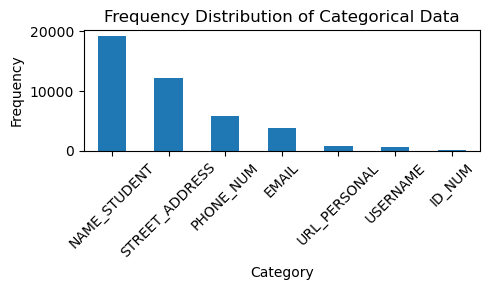

In [51]:

plt.figure(figsize=(5, 3))
# Plot the frequency distribution
count.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Categorical Data')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.tight_layout() 
plt.show()

### Token Length Distribution

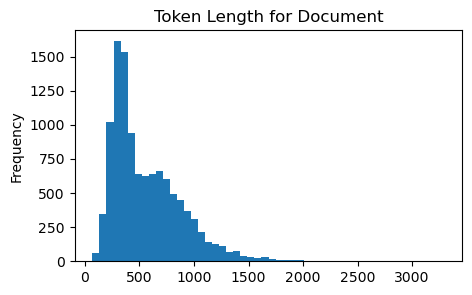

In [38]:
data['token_count'] = data['tokens'].apply(lambda x: len(x))
plt.figure(figsize=(5, 3))
data['token_count'].plot.hist(bins=50)
plt.title("Token Length for Document")
plt.grid(False)
plt.show()

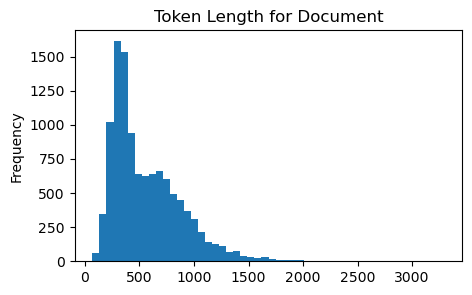

In [36]:
plt.figure(figsize=(5, 3))
data['token_count'].plot.hist(bins=50)
plt.title("Token Length for Document")
plt.grid(False)
plt.show()

## Removing rows with 0 non 'O' tokens

In [74]:
data1['is_labels'] = data1['labels'].apply(lambda labels: any(label != 'O' for label in labels))
ds_pos = data1[data1['is_labels']]
len(ds_pos)

5370

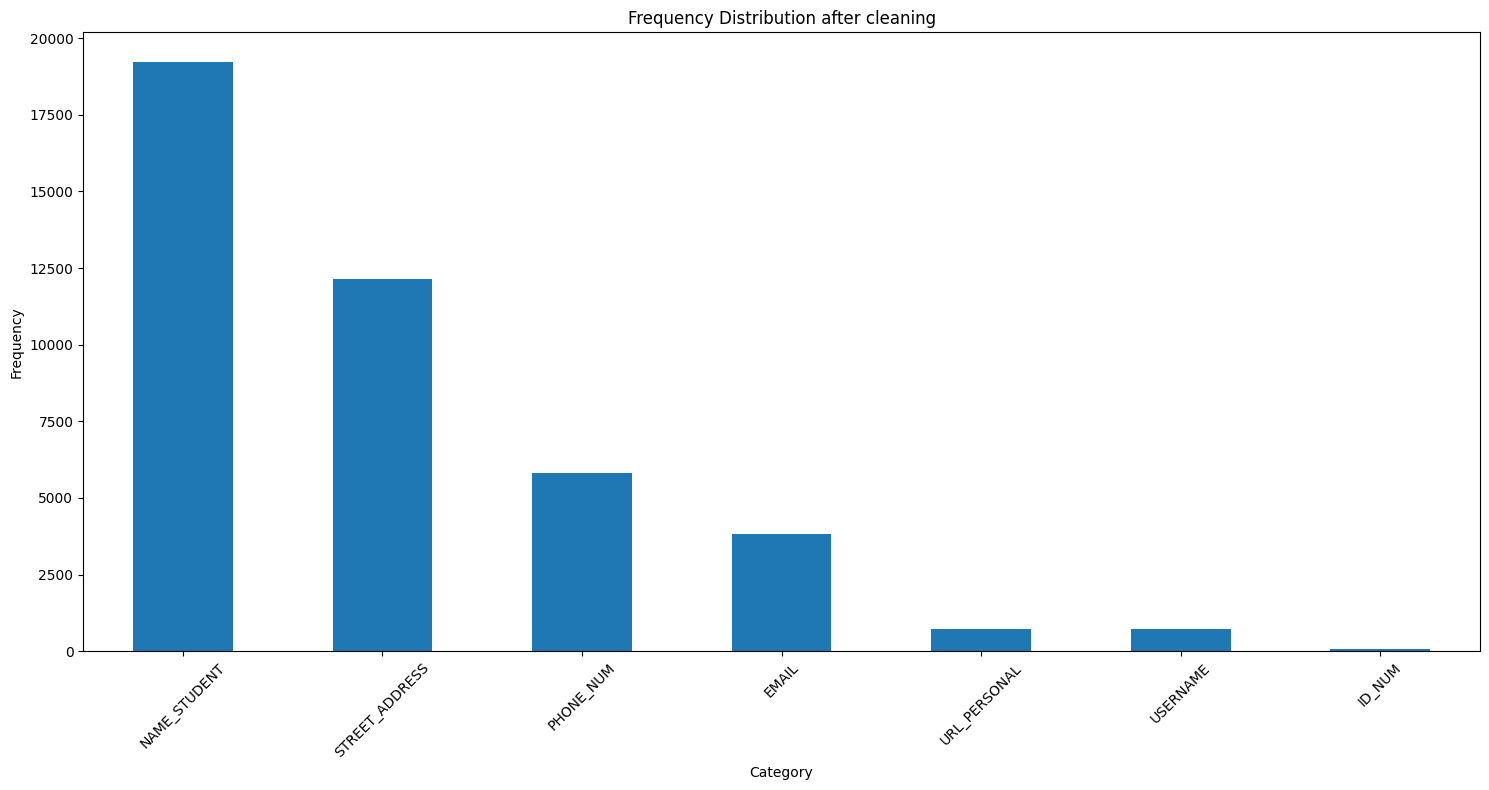

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
# Plot the frequency distribution
count.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.title('Frequency Distribution after cleaning')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.tight_layout() 
plt.show()

/var/folders/n8/b6_h9cbd1r3fjkr_2zjs39qw0000gn/T/ipykernel_62618/3974566369.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_pos['token_count'] = ds_pos['tokens'].apply(lambda x: len(x))


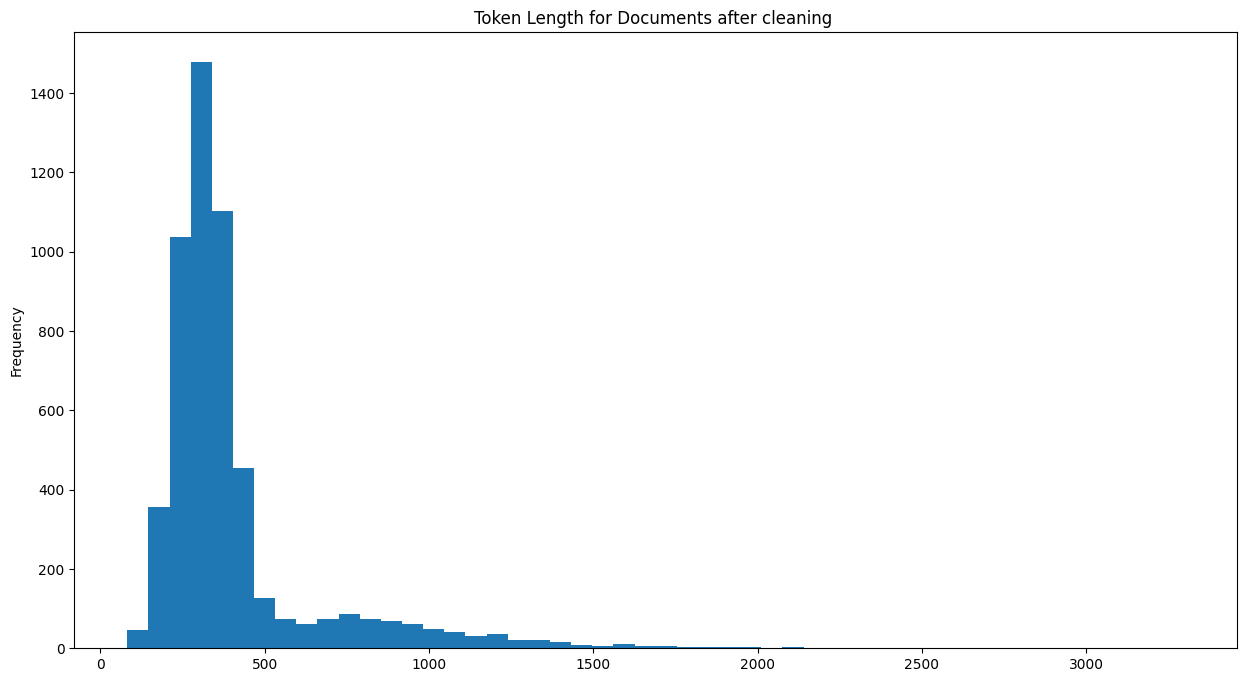

In [76]:
ds_pos['token_count'] = ds_pos['tokens'].apply(lambda x: len(x))
plt.figure(figsize=(15, 8))
ds_pos['token_count'].plot.hist(bins=50)
plt.title("Token Length for Documents after cleaning ")
plt.grid(False)
plt.show()

In [39]:
label_list = ['O',
                 'B-NAME_STUDENT',
                 'I-NAME_STUDENT',
                 'B-EMAIL',
                 'I-EMAIL',
                 'B-USERNAME',
                 'I-USERNAME',
                 'B-ID_NUM',
                 'I-ID_NUM' ,
                 'B-PHONE_NUM',
                 'I-PHONE_NUM',
                 'B-URL_PERSONAL',
                 'I-URL_PERSONAL',
                 'B-STREET_ADDRESS',
                 'I-STREET_ADDRESS']

encoder = {'O':0,
           'B-NAME_STUDENT': 1,
           'I-NAME_STUDENT': 2,
           'B-EMAIL': 3,
           'I-EMAIL': 4,
           'B-USERNAME': 5,
           'I-USERNAME': 6,
           'B-ID_NUM': 7,
           'I-ID_NUM' : 8,
           'B-PHONE_NUM': 9,
           'I-PHONE_NUM': 10,
           'B-URL_PERSONAL': 11,
           'I-URL_PERSONAL': 12,
           'B-STREET_ADDRESS': 13,
           'I-STREET_ADDRESS': 14}
decoder = {0: 'O',
           1: 'B-NAME_STUDENT',
           2: 'I-NAME_STUDENT',
           3: 'B-EMAIL',
           4: 'I-EMAIL',
           5: 'B-USERNAME',
           6: 'I-USERNAME',
           7: 'B-ID_NUM',
           8: 'I-ID_NUM',
           9: 'B-PHONE_NUM',
           10: 'I-PHONE_NUM',
           11: 'B-URL_PERSONAL',
           12: 'I-URL_PERSONAL',
           13: 'B-STREET_ADDRESS',
           14: 'I-STREET_ADDRESS'}

In [36]:
from transformers import AutoTokenizer
import pandas as pd
from datasets import Dataset, DatasetDict

In [28]:
df = pd.read_json('../data/train.json')
text = df.iloc[1]['full_text']
tokens = df.iloc[1]['tokens']
example = tokens[:10]
# example = 'I am a student at GWU and you can reach out to me through djones@gmail.com or (320) 202-688 5843'

In [40]:
def create_mapped_labels(labels):
    mapped_labels = pd.DataFrame({
                        'mapped_labels': labels
                    })['mapped_labels'].map(encoder).tolist()
    return mapped_labels

In [41]:
df['mapped_labels'] = df['labels'].apply(create_mapped_labels)

In [42]:
train_ds = Dataset.from_dict({
        'document': [document for document in df['document']],
        'full_text': [full_text for full_text in df['full_text']],
        'tokens': [tokens for tokens in df['tokens']],
        'trailing_whitespace': [trailing_whitespace for trailing_whitespace in df['trailing_whitespace']],
        'labels': [labels for labels in df['labels']],
        'mapped_labels': [mapped_labels for mapped_labels in df['mapped_labels']]
    })

In [43]:
def align_labels_with_tokens(labels, word_ids):
    new_labels = []
    current_word = None
    for word_id in word_ids:
        if word_id != current_word:
            # Start of a new word!
            current_word = word_id
            label = -100 if word_id is None else labels[word_id]
            new_labels.append(label)
        elif word_id is None:
            # Special token
            new_labels.append(-100)
        else:
            # Same word as previous token
            label = labels[word_id]
            # If the label is B-XXX we change it to I-XXX
            if label % 2 == 1:
                label += 1
            new_labels.append(label)

    return new_labels

In [44]:
def tokenize_and_align_labels(row):
    # print(type(row["tokens"]), type(row["tokens"][0]))
    tokenized_inputs = tokenizer(
        # row["tokens"][0], truncation=False #, is_split_into_words=True
        row["tokens"], padding='max_length', truncation=False, is_split_into_words=True, max_length=4096
        # row["tokens"], truncation=True, is_split_into_words=True
    )
    all_labels = row["mapped_labels"]
    new_labels = []
    for i, labels in enumerate(all_labels):
        word_ids = tokenized_inputs.word_ids(i)
        new_labels.append(align_labels_with_tokens(labels, word_ids))

    tokenized_inputs["labels"] = new_labels
    return tokenized_inputs

In [57]:
print(example)

['Diego', 'Estrada', '\n\n', 'Design', 'Thinking', 'Assignment', '\n\n', 'Visualization', 'Tool', '\n\n']


In [30]:
tokenizer = AutoTokenizer.from_pretrained("distilbert/distilbert-base-uncased")

In [31]:
tokenized_input = tokenizer(example, is_split_into_words = True)
tokens = tokenizer.convert_ids_to_tokens(tokenized_input["input_ids"])
print(tokens)

['[CLS]', '▁Diego', '▁E', 'str', 'ada', '▁Design', '▁Thinking', '▁Assignment', '▁Visual', 'ization', '▁Tool', '[SEP]']


In [58]:
tokenized_train = train_ds.map(
    tokenize_and_align_labels,
    batched=True
)

Map:   0%|          | 0/6807 [00:00<?, ? examples/s]

In [59]:
print('tokens:',tokenized_train[1]['tokens'][:10])
print('input_ids:',tokenized_train[1]['input_ids'][:10])
print('attention_mask:',tokenized_train[1]['attention_mask'][:10])

tokens: ['Diego', 'Estrada', '\n\n', 'Design', 'Thinking', 'Assignment', '\n\n', 'Visualization', 'Tool', '\n\n']
input_ids: [65, 9601, 513, 2637, 4864, 8596, 30808, 50245, 15713, 1735]
attention_mask: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

In [150]:
states = pd.read_json('../score.json')

In [151]:
states.columns

Index(['epoch', 'eval_f1', 'eval_loss', 'eval_precision', 'eval_recall',
       'eval_runtime', 'eval_samples_per_second', 'eval_steps_per_second',
       'step', 'grad_norm', 'learning_rate', 'loss'],
      dtype='object')

In [181]:
eval_scores = states[['step', 'eval_f1', 'eval_loss', 'eval_precision', 'eval_recall']]
param = states[['step', 'grad_norm', 'learning_rate', 'loss']]

In [183]:
eval_scores = eval_scores.dropna()
eval_scores = eval_scores.reset_index()
eval_scores = eval_scores.drop(['index'], axis=1)
# eval_scores.columns = ['Step', 'F1-Score', 'Loss', 'Precision', 'Recall']
# eval_scores = pd.melt(eval_scores, id_vars=['Step'], value_vars=['F1-Score', 'Loss', 'Precision','Recall'],ignore_index=True)

param = param.dropna()
param = param.reset_index()
param = param.drop(['index'], axis=1)
# param.columns = ['Step', 'Gradient Normalization', 'Learning Rate', 'Loss']
# param = pd.melt(param, id_vars=['Step'], value_vars=['Gradient Normalization', 'Learning Rate', 'Loss'],ignore_index=True)

In [184]:
# eval_scores[eval_scores['variable']=='Loss']
eval_scores

,step,eval_f1,eval_loss,eval_precision,eval_recall
0,300,0.838021,0.026652,0.755178,0.841715
1,600,0.876871,0.022784,0.840300,0.878401
2,900,0.876631,0.019102,0.825397,0.878813
3,1200,0.890938,0.017615,0.837003,0.893240
4,1500,0.888467,0.017231,0.843750,0.890354
5,1800,0.903095,0.013103,0.872366,0.904369
6,2100,0.923758,0.013077,0.857361,0.926628
7,2400,0.918122,0.012517,0.882167,0.919621
8,2700,0.914753,0.011347,0.906492,0.915087
9,3000,0.917729,0.011875,0.872848,0.919621


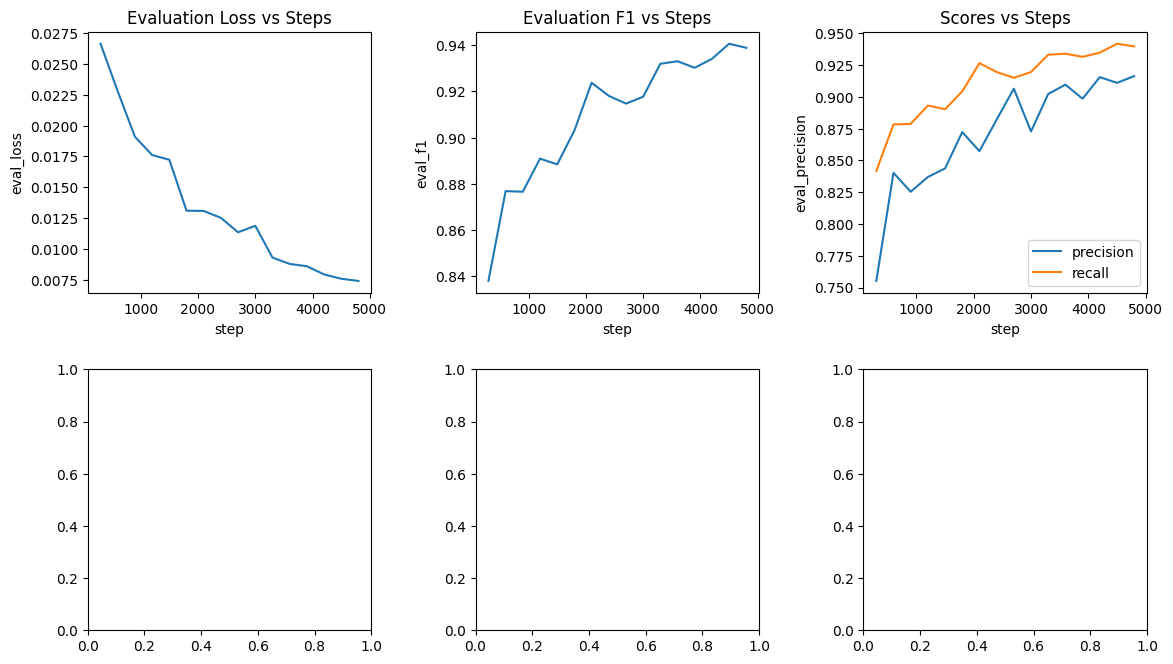

In [175]:
columns = ['eval_loss', 'eval_f1', 'eval_precision', 'eval_recall']

fig, positions = plt.subplots(2, 3, figsize=(12,7))

sns.lineplot(x='step', y='eval_loss', data=eval_scores, ax = positions[0, 0])
positions[0, 0].set_title('Evaluation Loss vs Steps')

sns.lineplot(data=eval_scores, x='step', y='eval_f1', ax = positions[0, 1])
positions[0, 1].set_title('Evaluation F1 vs Steps')

sns.lineplot(data=eval_scores, x='step', y='eval_precision', label='precision',ax = positions[0, 2])
sns.lineplot(data=eval_scores, x='step', y='eval_recall', label='recall', ax = positions[0, 2])
positions[0, 2].set_title('Scores vs Steps')

fig.tight_layout(pad = 2.0)

